In [10]:
#TITANIC DATA 

In [2]:
#For Data Wrangling
import numpy as np
import pandas as pd
#For Data Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [13]:
sns.set_style('whitegrid')

In [3]:
os.listdir()

['Untitled.ipynb',
 'test.csv',
 'Titanic_Complete.ipynb',
 'train.csv',
 '.ipynb_checkpoints']

In [4]:
#Read the train.csv file using pandas function pd.read_csv
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

In [5]:
#Observe the data

In [6]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
#Compare the count of Male and Female Passengers

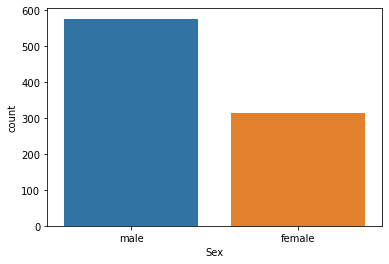

In [10]:
sns.countplot(x = 'Sex', data = titanic_train)

In [11]:
#More male were present than female. They are nearly double the female population in the ship

In [12]:
#Compare the count of people in each class

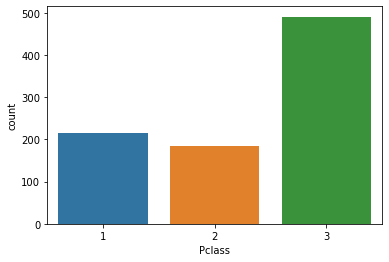

In [13]:
sns.countplot(x = 'Pclass', data = titanic_train)

In [14]:
#People belonging to third class are more than first followed by second. 
#Third class people are more than first and second class combined.

In [15]:
#Compare the count of people who survived with dead

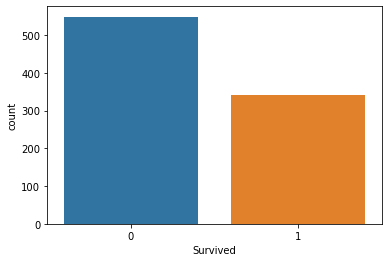

In [16]:
sns.countplot(x = 'Survived', data = titanic_train)

In [17]:
#People who survived are less than those that are dead.

In [18]:
#Embarked

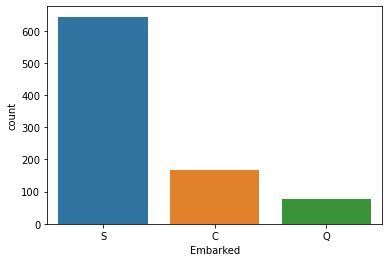

In [19]:
sns.countplot(x = 'Embarked', data = titanic_train)

People who embarked from S is higher

#Distribution of age of people in the 3 classes

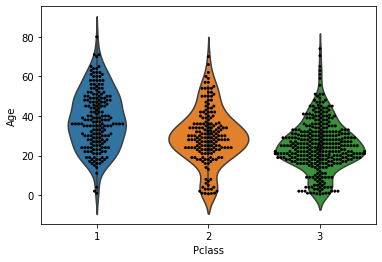

In [20]:
sns.violinplot(x='Pclass',y='Age',data=titanic_train)
sns.swarmplot(x='Pclass',y='Age',data=titanic_train,color = 'black',size =3)

Majority of people belong to the age group of 18 to 40.

#MISSING DATA

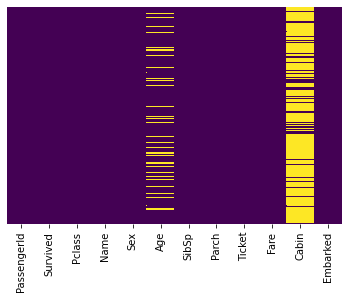

In [21]:
sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Missing values in each column can be oberved in the heatmap. Most of the values under cabin column are missing and a few in Age. Embarked has just 3 values missing as observed using info() function.

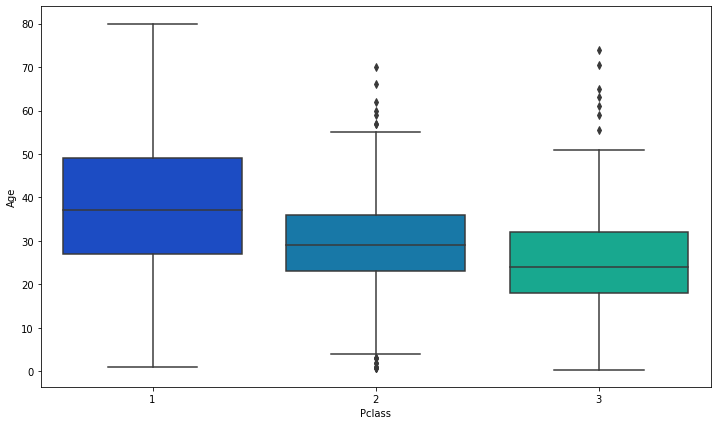

In [22]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic_train,palette='winter')

In [23]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [24]:
titanic_train['Age'] = titanic_train[['Age','Pclass']].apply(impute_age,axis=1)

In [25]:
titanic_train.drop('Cabin',axis=1,inplace=True)

In [26]:
titanic_train.dropna(inplace=True)

In [27]:
titanic_train['Embarked'] = titanic_train['Embarked'].fillna('S')

Data Cleaning on Test data:

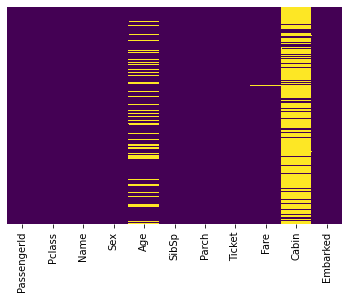

In [28]:
sns.heatmap(titanic_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

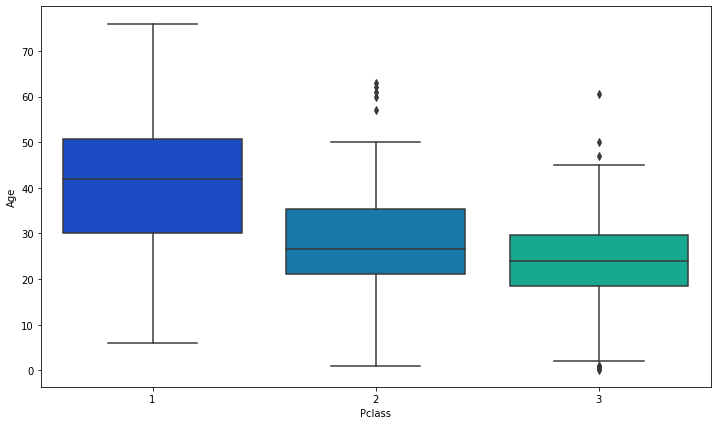

In [29]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic_test,palette='winter')

In [30]:
def impute_testage(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 42

        elif Pclass == 2:
            return 26

        else:
            return 24

    else:
        return Age

In [31]:
titanic_test['Age'] = titanic_test[['Age','Pclass']].apply(impute_testage,axis=1)

In [32]:
titanic_test.drop('Cabin',axis=1,inplace=True)

In [33]:
titanic_test.dropna(inplace=True)

#CONVERTING CATEGORICAL FEATURES

In [34]:
sex = pd.get_dummies(titanic_train['Sex'],drop_first=True)


In [40]:
from sklearn.ensemble import RandomForestClassifier
#Selecting features
features = ["Pclass", "Sex", "SibSp", "Parch"]

X = pd.get_dummies(titanic_train[features])
y = titanic_train["Survived"]
X_test = pd.get_dummies(titanic_test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': titanic_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)